# Enabling GPU for my notebook (You can remove this code if you are not using GPU)

In [1]:
import plaidml.keras
import os
plaidml.keras.install_backend()
os.environ["KERAS_BACKEND"] = "plaidml.keras.backend"

# 14. Import train & validate generators from Car Angle (Train) notebook since this is a separate notebook 

In [1]:
%run "Car_Angle_Direction_Classification (TrainGenImport).ipynb"

Found 3933 validated image filenames belonging to 10 classes.
Found 984 validated image filenames belonging to 10 classes.


# 15. Import and load trained model and use it to predict

Compile = FALSE because we are using "Saved Model" which was already compiled

Set batch size for model.pred generator predictions, the larger the batch, the faster the predictions 

In [2]:
from keras import models    

# Load Saved Model
model = models.load_model('SavedModel1.hdf5', compile = False)

batch_size = 20

INFO:plaidml:Opening device "opencl_amd_bristol_ridge.0"


# 16. Load test dataset and display in dataframe

In [5]:
# Prepare test data - 'Train' folder is used

# Create a list to get the categories of our test data (actual)
actual_categories=[]
actual_angles=[]

test_filepath = "tub280_copy\\tub_280_20-02-01(Copywithmeta)\\"  #train
test_filenames = sorted(os.listdir(test_filepath), key=len) 

# Lets check our data from directory is correct
print(test_filenames)

for filename in test_filenames:    
    if filename.endswith(".json") and not filename.startswith("meta"):
            with open(filepath+filename, 'r') as read_file:
            
                json_data = json.load(read_file)
                angle_value = float(json_data["user/angle"]) 
                    
                if -1.0 <= angle_value <= -0.8:
                    print(filename,"->", list(json_data)[1], ":",angle_value, "cat1", "\n") #call oobject in array
                    actual_categories.append("cat1")
                    actual_angles.append(angle_value)
                 
                elif -0.8 <= angle_value <= -0.6:
                    print(filename,"->", list(json_data)[1], ":",angle_value, "cat2", "\n") #call oobject in array
                    actual_categories.append("cat2")
                    actual_angles.append(angle_value)
                        
                elif -0.6 <= angle_value <= -0.4:
                    print(filename,"->", list(json_data)[1], ":",angle_value, "cat3", "\n") #call oobject in array
                    actual_categories.append("cat3")
                    actual_angles.append(angle_value)
                                      
                elif -0.4 <= angle_value <= -0.2:
                    print(filename,"->", list(json_data)[1], ":",angle_value, "cat4", "\n") #call oobject in array
                    actual_categories.append("cat4")
                    actual_angles.append(angle_value)
                                      
                elif -0.2 <= angle_value <= 0.0:
                    print(filename,"->", list(json_data)[1], ":",angle_value, "cat5", "\n") #call oobject in array
                    actual_categories.append("cat5")
                    actual_angles.append(angle_value)
                    
                elif 0.0 <= angle_value <= 0.2:
                    print(filename,"->", list(json_data)[1], ":",angle_value, "cat6", "\n") #call oobject in array
                    actual_categories.append("cat6")
                    actual_angles.append(angle_value)
                
                elif 0.2 <= angle_value <= 0.4:
                    print(filename,"->", list(json_data)[1], ":",angle_value, "cat7", "\n") #call oobject in array
                    actual_categories.append("cat7")
                    actual_angles.append(angle_value)
                    
                elif 0.4 <= angle_value <= 0.6:
                    print(filename,"->", list(json_data)[1], ":",angle_value, "cat8", "\n") #call oobject in array
                    actual_categories.append("cat8")
                    actual_angles.append(angle_value)
                
                elif 0.6 <= angle_value <= 0.8:
                    print(filename,"->", list(json_data)[1], ":",angle_value, "cat9", "\n") #call oobject in array
                    actual_categories.append("cat9")
                    actual_angles.append(angle_value)
                    
                elif 0.8 <= angle_value <= 1.0:
                    print(filename,"->", list(json_data)[1], ":",angle_value, "cat10", "\n") #call oobject in array
                    actual_categories.append("cat10")
                    actual_angles.append(angle_value)
                                
# The amount of categories should correspond to amount of json files
y = len(actual_categories)
print("Total actual categories of test json files:", y)

# Count the total number of image & json files and categories for each json file
# Image and Json files should correspond to one another 
print("Total test json files:", int((len(test_filenames))-y))
print("Total test image files:",int((len(test_filenames))/2))
print("Total test json and image files:", len(test_filenames)) 
print("Total actual angles for all actual categories:", len(actual_angles))

# Store filename and category in dataframe      
# Array length of json, image and category should be the same
# *IMPORTANT* (amount in filename MUST CORRESPOND TO amount in categories)
test_df = pd.DataFrame({
    'json_filename': test_filenames[1:y+1],
    'image_filename': test_filenames[y+1:2*y+1],
    'actual_category': actual_categories,
    'actual_angle_value': actual_angles
        
})

# This is how the files are displayed in dataframe
test_df

['meta.json', 'record_1.json', 'record_2.json', 'record_3.json', 'record_4.json', 'record_5.json', 'record_6.json', 'record_7.json', 'record_8.json', 'record_9.json', 'record_10.json', 'record_11.json', 'record_12.json', 'record_13.json', 'record_14.json', 'record_15.json', 'record_16.json', 'record_17.json', 'record_18.json', 'record_19.json', 'record_20.json', 'record_21.json', 'record_22.json', 'record_23.json', 'record_24.json', 'record_25.json', 'record_26.json', 'record_27.json', 'record_28.json', 'record_29.json', 'record_30.json', 'record_31.json', 'record_32.json', 'record_33.json', 'record_34.json', 'record_35.json', 'record_36.json', 'record_37.json', 'record_38.json', 'record_39.json', 'record_40.json', 'record_41.json', 'record_42.json', 'record_43.json', 'record_44.json', 'record_45.json', 'record_46.json', 'record_47.json', 'record_48.json', 'record_49.json', 'record_50.json', 'record_51.json', 'record_52.json', 'record_53.json', 'record_54.json', 'record_55.json', 'reco

record_40.json -> user/angle : 0.279751079508876 cat7 

record_41.json -> user/angle : 0.31347372678552915 cat7 

record_42.json -> user/angle : 0.32266244339205563 cat7 

record_43.json -> user/angle : 0.3246157904942385 cat7 

record_44.json -> user/angle : 0.3112947339031142 cat7 

record_45.json -> user/angle : 0.2925812761111939 cat7 

record_46.json -> user/angle : 0.2925812761111939 cat7 

record_47.json -> user/angle : 0.23116531089705328 cat7 

record_48.json -> user/angle : 0.20748861327131635 cat7 

record_49.json -> user/angle : 0.18377142801063948 cat6 

record_50.json -> user/angle : 0.16085835434093226 cat6 

record_51.json -> user/angle : 0.05225802448148781 cat6 

record_52.json -> user/angle : -0.0103455821773849 cat5 

record_53.json -> user/angle : -0.0103455821773849 cat5 

record_54.json -> user/angle : -0.07179540327573532 cat5 

record_55.json -> user/angle : -0.10168698779846974 cat5 

record_56.json -> user/angle : -0.12628008166904633 cat5 

record_57.json ->

record_197.json -> user/angle : 0.25384538587852296 cat7 

record_198.json -> user/angle : 0.25384538587852296 cat7 

record_199.json -> user/angle : 0.11138344263884935 cat6 

record_200.json -> user/angle : -0.01903548170490866 cat5 

record_201.json -> user/angle : -0.02807117506296072 cat5 

record_202.json -> user/angle : -0.023393048832803996 cat5 

record_203.json -> user/angle : -0.018714676830648917 cat5 

record_204.json -> user/angle : -0.01874978637490142 cat5 

record_205.json -> user/angle : -0.01874978637490142 cat5 

record_206.json -> user/angle : -0.018785027897084028 cat5 

record_207.json -> user/angle : -0.018820402142738064 cat5 

record_208.json -> user/angle : -0.02356958496870339 cat5 

record_209.json -> user/angle : -0.02356958496870339 cat5 

record_210.json -> user/angle : -0.04713288631326713 cat5 

record_211.json -> user/angle : -0.04713288631326713 cat5 

record_212.json -> user/angle : -0.06138086660206124 cat5 

record_213.json -> user/angle : -0.0943

record_372.json -> user/angle : -0.0538148669655005 cat5 

record_373.json -> user/angle : -0.0538148669655005 cat5 

record_374.json -> user/angle : -0.09379470399320787 cat5 

record_375.json -> user/angle : -0.09379470399320787 cat5 

record_376.json -> user/angle : -0.09396256061683542 cat5 

record_377.json -> user/angle : -0.09396256061683542 cat5 

record_378.json -> user/angle : -0.09843011161068096 cat5 

record_379.json -> user/angle : -0.12476856494957612 cat5 

record_380.json -> user/angle : -0.345983866356046 cat4 

record_381.json -> user/angle : -0.4227655044565196 cat3 

record_382.json -> user/angle : -0.4227655044565196 cat3 

record_383.json -> user/angle : -0.40720424137500416 cat3 

record_384.json -> user/angle : -0.37925493591256737 cat4 

record_385.json -> user/angle : -0.36631413002106367 cat4 

record_386.json -> user/angle : -0.3619938654728091 cat4 

record_387.json -> user/angle : -0.3619938654728091 cat4 

record_388.json -> user/angle : -0.3576701536309

record_536.json -> user/angle : 0.14725571501915133 cat6 

record_537.json -> user/angle : 0.05510012814593738 cat6 

record_538.json -> user/angle : 0.05510012814593738 cat6 

record_539.json -> user/angle : -0.5934952337549586 cat3 

record_540.json -> user/angle : -0.8960201195631174 cat1 

record_541.json -> user/angle : -0.9362221960641961 cat1 

record_542.json -> user/angle : -0.9362221960641961 cat1 

record_543.json -> user/angle : -0.9538158189549109 cat1 

record_544.json -> user/angle : -0.9538158189549109 cat1 

record_545.json -> user/angle : -0.9648468906686413 cat1 

record_546.json -> user/angle : -0.9665857360430267 cat1 

record_547.json -> user/angle : -0.9718368311369024 cat1 

record_548.json -> user/angle : -0.9735987284282078 cat1 

record_549.json -> user/angle : -0.9735987284282078 cat1 

record_550.json -> user/angle : -0.9705280761703184 cat1 

record_551.json -> user/angle : -0.9553844083463828 cat1 

record_552.json -> user/angle : -0.7253098978043556 cat2

record_738.json -> user/angle : 0.033437531005857994 cat6 

record_739.json -> user/angle : 0.033437531005857994 cat6 

record_740.json -> user/angle : 0.03821319144144024 cat6 

record_741.json -> user/angle : 0.03806765304236049 cat6 

record_742.json -> user/angle : 0.033246858892386384 cat6 

record_743.json -> user/angle : 0.033246858892386384 cat6 

record_744.json -> user/angle : 0.01403610819600191 cat6 

record_745.json -> user/angle : 0.009305258655584268 cat6 

record_746.json -> user/angle : 0.013854499727873941 cat6 

record_747.json -> user/angle : 0.01840450550202794 cat6 

record_748.json -> user/angle : 0.01840450550202794 cat6 

record_749.json -> user/angle : 0.032146963036445535 cat6 

record_750.json -> user/angle : 0.032146963036445535 cat6 

record_751.json -> user/angle : 0.03673837636942799 cat6 

record_752.json -> user/angle : 0.03667098187543643 cat6 

record_753.json -> user/angle : 0.04125374577521393 cat6 

record_754.json -> user/angle : 0.04117820633114

record_889.json -> user/angle : 0.6627617655505795 cat9 

record_890.json -> user/angle : 0.6627617655505795 cat9 

record_891.json -> user/angle : 0.6942332349092254 cat9 

record_892.json -> user/angle : 0.6942332349092254 cat9 

record_893.json -> user/angle : 0.7020970345575681 cat9 

record_894.json -> user/angle : 0.7050217748309076 cat9 

record_895.json -> user/angle : 0.611127419033195 cat9 

record_896.json -> user/angle : 0.35107453134009964 cat7 

record_897.json -> user/angle : 0.35107453134009964 cat7 

record_898.json -> user/angle : -0.3099016750187499 cat4 

record_899.json -> user/angle : -0.4240822518141111 cat3 

record_900.json -> user/angle : -0.5593672209051846 cat3 

record_901.json -> user/angle : -0.5722691972018752 cat3 

record_902.json -> user/angle : -0.5722691972018752 cat3 

record_903.json -> user/angle : -0.6440572472445175 cat2 

record_904.json -> user/angle : -0.6440572472445175 cat2 

record_905.json -> user/angle : -0.8306864537487381 cat1 

recor

record_1039.json -> user/angle : -0.08769317167149893 cat5 

record_1040.json -> user/angle : -0.027708005280845528 cat5 

record_1041.json -> user/angle : 0.08753143612065921 cat6 

record_1042.json -> user/angle : 0.2759133590493454 cat7 

record_1043.json -> user/angle : 0.3341092727496988 cat7 

record_1044.json -> user/angle : 0.35079165154355413 cat7 

record_1045.json -> user/angle : 0.35079165154355413 cat7 

record_1046.json -> user/angle : 0.35079165154355413 cat7 

record_1047.json -> user/angle : 0.38710286814545897 cat7 

record_1048.json -> user/angle : 0.44455546991835 cat8 

record_1049.json -> user/angle : 0.5039669652695713 cat8 

record_1050.json -> user/angle : 0.5188552921213674 cat8 

record_1051.json -> user/angle : 0.525077886077861 cat8 

record_1052.json -> user/angle : 0.505767230127512 cat8 

record_1053.json -> user/angle : 0.505767230127512 cat8 

record_1054.json -> user/angle : 0.08507788297094288 cat6 

record_1055.json -> user/angle : 0.085077882970942

record_1201.json -> user/angle : -0.618027250394109 cat2 

record_1202.json -> user/angle : -0.6236234218410334 cat2 

record_1203.json -> user/angle : -0.6152691623889922 cat2 

record_1204.json -> user/angle : -0.6032093189715432 cat2 

record_1205.json -> user/angle : -0.5994941343575542 cat3 

record_1206.json -> user/angle : -0.5957747877037872 cat3 

record_1207.json -> user/angle : -0.5957747877037872 cat3 

record_1208.json -> user/angle : -0.5957747877037872 cat3 

record_1209.json -> user/angle : -0.5883235175814223 cat3 

record_1210.json -> user/angle : -0.5883235175814223 cat3 

record_1211.json -> user/angle : -0.5487474974651787 cat3 

record_1212.json -> user/angle : -0.3646855529485651 cat4 

record_1213.json -> user/angle : -0.14335481051001372 cat5 

record_1214.json -> user/angle : -0.05332164186382719 cat5 

record_1215.json -> user/angle : -0.041087985294128784 cat5 

record_1216.json -> user/angle : -0.041223550667191744 cat5 

record_1217.json -> user/angle : -0

record_1354.json -> user/angle : -0.12383266598830663 cat5 

record_1355.json -> user/angle : -0.12063196134302424 cat5 

record_1356.json -> user/angle : -0.12063196134302424 cat5 

record_1357.json -> user/angle : -0.11704695238418562 cat5 

record_1358.json -> user/angle : -0.11704695238418562 cat5 

record_1359.json -> user/angle : -0.11704695238418562 cat5 

record_1360.json -> user/angle : -0.11722390978456164 cat5 

record_1361.json -> user/angle : -0.11722390978456164 cat5 

record_1362.json -> user/angle : -0.11000886296852674 cat5 

record_1363.json -> user/angle : -0.11000886296852674 cat5 

record_1364.json -> user/angle : -0.11000886296852674 cat5 

record_1365.json -> user/angle : -0.10622248809993154 cat5 

record_1366.json -> user/angle : -0.10622248809993154 cat5 

record_1367.json -> user/angle : -0.10622248809993154 cat5 

record_1368.json -> user/angle : -0.10622248809993154 cat5 

record_1369.json -> user/angle : -0.10259091434833585 cat5 

record_1370.json -> user


record_1508.json -> user/angle : -0.3505854568480744 cat4 

record_1509.json -> user/angle : -0.3505854568480744 cat4 

record_1510.json -> user/angle : -0.342856991023818 cat4 

record_1511.json -> user/angle : -0.342856991023818 cat4 

record_1512.json -> user/angle : -0.3278833322134361 cat4 

record_1513.json -> user/angle : -0.3278833322134361 cat4 

record_1514.json -> user/angle : -0.2596831492335143 cat4 

record_1515.json -> user/angle : -0.10485210807808738 cat5 

record_1516.json -> user/angle : 0.04930250199860323 cat6 

record_1517.json -> user/angle : 0.07454843279213703 cat6 

record_1518.json -> user/angle : 0.09170221820615625 cat6 

record_1519.json -> user/angle : 0.11307051079627066 cat6 

record_1520.json -> user/angle : 0.11307051079627066 cat6 

record_1521.json -> user/angle : 0.2981961362510495 cat7 

record_1522.json -> user/angle : 0.2981961362510495 cat7 

record_1523.json -> user/angle : 0.287878629808079 cat7 

record_1524.json -> user/angle : 0.262009535

record_1662.json -> user/angle : -0.013103799337085088 cat5 

record_1663.json -> user/angle : -0.013103799337085088 cat5 

record_1664.json -> user/angle : -0.013103799337085088 cat5 

record_1665.json -> user/angle : -0.013103799337085088 cat5 

record_1666.json -> user/angle : -0.00873588839929622 cat5 

record_1667.json -> user/angle : 0.017532757303177847 cat6 

record_1668.json -> user/angle : 0.04398050343894996 cat6 

record_1669.json -> user/angle : 0.05726939334615304 cat6 

record_1670.json -> user/angle : 0.06619097024691185 cat6 

record_1671.json -> user/angle : 0.06619097024691185 cat6 

record_1672.json -> user/angle : 0.07060035519487806 cat6 

record_1673.json -> user/angle : 0.07060035519487806 cat6 

record_1674.json -> user/angle : 0.0751415878549766 cat6 

record_1675.json -> user/angle : 0.079557392752916 cat6 

record_1676.json -> user/angle : 0.08838659070595972 cat6 

record_1677.json -> user/angle : 0.08838659070595972 cat6 

record_1678.json -> user/angle : 

record_1819.json -> user/angle : 0.11074534191116059 cat6 

record_1820.json -> user/angle : 0.10649385889257335 cat6 

record_1821.json -> user/angle : 0.09373374173702846 cat6 

record_1822.json -> user/angle : 0.02131737300322467 cat6 

record_1823.json -> user/angle : -0.34223759593570013 cat4 

record_1824.json -> user/angle : -0.5345508288015076 cat3 

record_1825.json -> user/angle : -0.5450964244166567 cat3 

record_1826.json -> user/angle : -0.5450964244166567 cat3 

record_1827.json -> user/angle : -0.5260850256156943 cat3 

record_1828.json -> user/angle : -0.5100901284847448 cat3 

record_1829.json -> user/angle : -0.45178052855709583 cat3 

record_1830.json -> user/angle : -0.36046640728015383 cat4 

record_1831.json -> user/angle : -0.36046640728015383 cat4 

record_1832.json -> user/angle : -0.22581897027622744 cat4 

record_1833.json -> user/angle : -0.0991708260812091 cat5 

record_1834.json -> user/angle : 0.05231271638401504 cat6 

record_1835.json -> user/angle : 0.

record_2013.json -> user/angle : -0.8509281931240177 cat1 

record_2014.json -> user/angle : -0.8509281931240177 cat1 

record_2015.json -> user/angle : -0.8819431395067147 cat1 

record_2016.json -> user/angle : -0.8947751795705489 cat1 

record_2017.json -> user/angle : -0.9231159925362687 cat1 

record_2018.json -> user/angle : -0.9304339186949663 cat1 

record_2019.json -> user/angle : -0.9418490990824214 cat1 

record_2020.json -> user/angle : -0.9418490990824214 cat1 

record_2021.json -> user/angle : -0.9418490990824214 cat1 

record_2022.json -> user/angle : -0.9124800119741125 cat1 

record_2023.json -> user/angle : -0.6443730432565504 cat2 

record_2024.json -> user/angle : -0.11469912678200835 cat5 

record_2025.json -> user/angle : -0.06886582240924481 cat5 

record_2026.json -> user/angle : -0.12961685708296264 cat5 

record_2027.json -> user/angle : -0.12961685708296264 cat5 

record_2028.json -> user/angle : -0.15816839712521544 cat5 

record_2029.json -> user/angle : -0

record_2175.json -> user/angle : -1.0 cat1 

record_2176.json -> user/angle : -1.0 cat1 

record_2177.json -> user/angle : -1.0 cat1 

record_2178.json -> user/angle : -1.0 cat1 

record_2179.json -> user/angle : -0.9577225078959134 cat1 

record_2180.json -> user/angle : -0.9577225078959134 cat1 

record_2181.json -> user/angle : -0.4900044006100724 cat3 

record_2182.json -> user/angle : -0.10496246364023094 cat5 

record_2183.json -> user/angle : -0.08262525096865846 cat5 

record_2184.json -> user/angle : -0.08737057589247069 cat5 

record_2185.json -> user/angle : -0.07832732477129535 cat5 

record_2186.json -> user/angle : -0.06937554955318757 cat5 

record_2187.json -> user/angle : -0.06937554955318757 cat5 

record_2188.json -> user/angle : -0.014062584435951193 cat5 

record_2189.json -> user/angle : 0.037995298726861956 cat6 

record_2190.json -> user/angle : 0.20258114113626205 cat7 

record_2191.json -> user/angle : 0.25203469550084423 cat7 

record_2192.json -> user/angle 

record_2347.json -> user/angle : -0.07955739275291514 cat5 

record_2348.json -> user/angle : -0.044688510069453444 cat5 

record_2349.json -> user/angle : 0.018039091882030425 cat6 

record_2350.json -> user/angle : 0.0912912882451026 cat6 

record_2351.json -> user/angle : 0.10095916111183245 cat6 

record_2352.json -> user/angle : 0.09230238573625756 cat6 

record_2353.json -> user/angle : 0.08769303079778627 cat6 

record_2354.json -> user/angle : 0.08769303079778627 cat6 

record_2355.json -> user/angle : 0.09247309069263827 cat6 

record_2356.json -> user/angle : 0.09264441730625082 cat6 

record_2357.json -> user/angle : 0.10671516967616268 cat6 

record_2358.json -> user/angle : 0.10671516967616268 cat6 

record_2359.json -> user/angle : 0.08801802558469717 cat6 

record_2360.json -> user/angle : 0.06924740607245203 cat6 

record_2361.json -> user/angle : 0.046004719366257385 cat6 

record_2362.json -> user/angle : 0.04132955819824186 cat6 

record_2363.json -> user/angle : 0.0

record_2490.json -> user/angle : -0.3857136516714534 cat4 

record_2491.json -> user/angle : -0.3857136516714534 cat4 

record_2492.json -> user/angle : -0.9539934472013675 cat1 

record_2493.json -> user/angle : -0.9539934472013675 cat1 

record_2494.json -> user/angle : -1.0 cat1 

record_2495.json -> user/angle : -1.0 cat1 

record_2496.json -> user/angle : -1.0 cat1 

record_2497.json -> user/angle : -1.0 cat1 

record_2498.json -> user/angle : -1.0 cat1 

record_2499.json -> user/angle : -1.0 cat1 

record_2500.json -> user/angle : -1.0 cat1 

record_2501.json -> user/angle : -1.0 cat1 

record_2502.json -> user/angle : -1.0 cat1 

record_2503.json -> user/angle : -1.0 cat1 

record_2504.json -> user/angle : -1.0 cat1 

record_2505.json -> user/angle : -1.0 cat1 

record_2506.json -> user/angle : -0.9020090250058357 cat1 

record_2507.json -> user/angle : -0.9020090250058357 cat1 

record_2508.json -> user/angle : -0.3457352197571784 cat4 

record_2509.json -> user/angle : -0.0931

record_2706.json -> user/angle : -0.7346939086914058 cat2 

record_2707.json -> user/angle : -0.7346939086914058 cat2 

record_2708.json -> user/angle : -0.7346939086914058 cat2 

record_2709.json -> user/angle : 0.2710521153041301 cat7 

record_2710.json -> user/angle : 0.2710521153041301 cat7 

record_2711.json -> user/angle : 0.4636417933872769 cat8 

record_2712.json -> user/angle : 0.4636417933872769 cat8 

record_2713.json -> user/angle : 0.4636417933872769 cat8 

record_2714.json -> user/angle : 0.6704973493303575 cat9 

record_2715.json -> user/angle : 0.6704973493303575 cat9 

record_2716.json -> user/angle : 0.7917574201311387 cat9 

record_2717.json -> user/angle : 0.7917574201311387 cat9 

record_2718.json -> user/angle : 0.784624590192523 cat9 

record_2719.json -> user/angle : 0.784624590192523 cat9 

record_2720.json -> user/angle : 0.6776303972516745 cat9 

record_2721.json -> user/angle : 0.6776303972516745 cat9 

record_2722.json -> user/angle : 0.6776303972516745 cat

record_2884.json -> user/angle : 0.028531755719866374 cat6 

record_2885.json -> user/angle : -0.2639190673828125 cat4 

record_2886.json -> user/angle : -0.2639190673828125 cat4 

record_2887.json -> user/angle : -0.4493759155273437 cat3 

record_2888.json -> user/angle : -0.4493759155273437 cat3 

record_2889.json -> user/angle : -0.4493759155273437 cat3 

record_2890.json -> user/angle : -0.5563701084681921 cat3 

record_2891.json -> user/angle : -0.5563701084681921 cat3 

record_2892.json -> user/angle : -0.5706359863281248 cat3 

record_2893.json -> user/angle : -0.5706359863281248 cat3 

record_2894.json -> user/angle : -0.13552594866071385 cat5 

record_2895.json -> user/angle : -0.13552594866071385 cat5 

record_2896.json -> user/angle : 0.25678623744419715 cat7 

record_2897.json -> user/angle : 0.25678623744419715 cat7 

record_2898.json -> user/angle : 0.25678623744419715 cat7 

record_2899.json -> user/angle : 0.20685555594308075 cat7 

record_2900.json -> user/angle : 0.20

record_3051.json -> user/angle : 0.7418269566127239 cat9 

record_3052.json -> user/angle : 0.7418269566127239 cat9 

record_3053.json -> user/angle : 0.8345552716936387 cat10 

record_3054.json -> user/angle : 0.8345552716936387 cat10 

record_3055.json -> user/angle : 0.8274222237723217 cat10 

record_3056.json -> user/angle : 0.8274222237723217 cat10 

record_3057.json -> user/angle : 0.7988904680524558 cat9 

record_3058.json -> user/angle : 0.7988904680524558 cat9 

record_3059.json -> user/angle : 0.32098279680524555 cat7 

record_3060.json -> user/angle : 0.32098279680524555 cat7 

record_3061.json -> user/angle : -0.19811781871315687 cat5 

record_3062.json -> user/angle : -0.19811781871315687 cat5 

record_3063.json -> user/angle : -0.19811781871315687 cat5 

record_3064.json -> user/angle : -0.22000358628530195 cat4 

record_3065.json -> user/angle : -0.22000358628530195 cat4 

record_3066.json -> user/angle : -0.20117280728758916 cat4 

record_3067.json -> user/angle : -0.20

record_3221.json -> user/angle : 0.5349711826869424 cat8 

record_3222.json -> user/angle : 0.37091347830636223 cat7 

record_3223.json -> user/angle : 0.37091347830636223 cat7 

record_3224.json -> user/angle : -0.6990291050502229 cat2 

record_3225.json -> user/angle : -0.6990291050502229 cat2 

record_3226.json -> user/angle : -1.0 cat1 

record_3227.json -> user/angle : -1.0 cat1 

record_3228.json -> user/angle : -1.0 cat1 

record_3229.json -> user/angle : -1.0 cat1 

record_3230.json -> user/angle : -1.0 cat1 

record_3231.json -> user/angle : -1.0 cat1 

record_3232.json -> user/angle : -1.0 cat1 

record_3233.json -> user/angle : -1.0 cat1 

record_3234.json -> user/angle : -1.0 cat1 

record_3235.json -> user/angle : -1.0 cat1 

record_3236.json -> user/angle : -1.0 cat1 

record_3237.json -> user/angle : -1.0 cat1 

record_3238.json -> user/angle : -1.0 cat1 

record_3239.json -> user/angle : -1.0 cat1 

record_3240.json -> user/angle : -1.0 cat1 

record_3241.json -> user/a

record_3382.json -> user/angle : -1.0 cat1 

record_3383.json -> user/angle : -1.0 cat1 

record_3384.json -> user/angle : -1.0 cat1 

record_3385.json -> user/angle : -1.0 cat1 

record_3386.json -> user/angle : -1.0 cat1 

record_3387.json -> user/angle : -0.13552594866071396 cat5 

record_3388.json -> user/angle : -0.13552594866071396 cat5 

record_3389.json -> user/angle : -0.09986136300223192 cat5 

record_3390.json -> user/angle : -0.09986136300223192 cat5 

record_3391.json -> user/angle : -0.14265899658203085 cat5 

record_3392.json -> user/angle : -0.14265899658203085 cat5 

record_3393.json -> user/angle : -0.14265899658203085 cat5 

record_3394.json -> user/angle : -0.1925896780831475 cat5 

record_3395.json -> user/angle : -0.1925896780831475 cat5 

record_3396.json -> user/angle : -0.1925896780831474 cat5 

record_3397.json -> user/angle : -0.1925896780831474 cat5 

record_3398.json -> user/angle : -0.1925896780831474 cat5 

record_3399.json -> user/angle : -0.192589678083

record_3558.json -> user/angle : -0.5349711826869417 cat3 

record_3559.json -> user/angle : -0.5349711826869417 cat3 

record_3560.json -> user/angle : -0.4565087454659602 cat3 

record_3561.json -> user/angle : -0.4565087454659602 cat3 

record_3562.json -> user/angle : -0.3281156267438613 cat4 

record_3563.json -> user/angle : -0.3281156267438613 cat4 

record_3564.json -> user/angle : -0.3281156267438613 cat4 

record_3565.json -> user/angle : -0.07846243722098185 cat5 

record_3566.json -> user/angle : -0.07846243722098185 cat5 

record_3567.json -> user/angle : 0.1711907523018976 cat6 

record_3568.json -> user/angle : 0.1711907523018976 cat6 

record_3569.json -> user/angle : 0.31384974888392914 cat7 

record_3570.json -> user/angle : 0.31384974888392914 cat7 

record_3571.json -> user/angle : 0.31384974888392914 cat7 

record_3572.json -> user/angle : 0.3352486746651788 cat7 

record_3573.json -> user/angle : 0.3352486746651788 cat7 

record_3574.json -> user/angle : 0.4208441

record_3822.json -> user/angle : -1.0 cat1 

record_3823.json -> user/angle : -1.0 cat1 

record_3824.json -> user/angle : -0.9986130850655695 cat1 

record_3825.json -> user/angle : -0.9986130850655695 cat1 

record_3826.json -> user/angle : -0.6918961661202566 cat2 

record_3827.json -> user/angle : -0.6918961661202566 cat2 

record_3828.json -> user/angle : -0.1355259486607147 cat5 

record_3829.json -> user/angle : -0.1355259486607147 cat5 

record_3830.json -> user/angle : -0.1355259486607147 cat5 

record_3831.json -> user/angle : -0.007133047921316848 cat5 

record_3832.json -> user/angle : -0.007133047921316848 cat5 

record_3833.json -> user/angle : 0.09986136300223282 cat6 

record_3834.json -> user/angle : 0.09986136300223282 cat6 

record_3835.json -> user/angle : 0.17119075230189795 cat6 

record_3836.json -> user/angle : 0.17119075230189795 cat6 

record_3837.json -> user/angle : 0.17119075230189795 cat6 

record_3838.json -> user/angle : 0.18545663016183067 cat6 

record

record_3995.json -> user/angle : 0.306716918945313 cat7 

record_3996.json -> user/angle : 0.46364179338727746 cat8 

record_3997.json -> user/angle : 0.46364179338727746 cat8 

record_3998.json -> user/angle : 0.49930659702846014 cat8 

record_3999.json -> user/angle : 0.49930659702846014 cat8 

record_4000.json -> user/angle : 0.49217354910714317 cat8 

record_4001.json -> user/angle : 0.49217354910714317 cat8 

record_4002.json -> user/angle : 0.49217354910714317 cat8 

record_4003.json -> user/angle : 0.39231218610491136 cat7 

record_4004.json -> user/angle : 0.39231218610491136 cat7 

record_4005.json -> user/angle : 0.17119075230189762 cat6 

record_4006.json -> user/angle : 0.17119075230189762 cat6 

record_4007.json -> user/angle : 0.17119075230189762 cat6 

record_4008.json -> user/angle : -0.04279763357979889 cat5 

record_4009.json -> user/angle : -0.04279763357979889 cat5 

record_4010.json -> user/angle : -0.17119075230189718 cat5 

record_4011.json -> user/angle : -0.171

record_4149.json -> user/angle : -0.46364179338727723 cat3 

record_4150.json -> user/angle : -0.46364179338727723 cat3 

record_4151.json -> user/angle : -0.46364179338727723 cat3 

record_4152.json -> user/angle : -0.46364179338727723 cat3 

record_4153.json -> user/angle : -0.45650874546595976 cat3 

record_4154.json -> user/angle : -0.45650874546595976 cat3 

record_4155.json -> user/angle : -0.356647600446428 cat4 

record_4156.json -> user/angle : -0.356647600446428 cat4 

record_4157.json -> user/angle : 0.1997227260044646 cat6 

record_4158.json -> user/angle : 0.1997227260044646 cat6 

record_4159.json -> user/angle : 0.20685555594308078 cat7 

record_4160.json -> user/angle : 0.20685555594308078 cat7 

record_4161.json -> user/angle : 0.20685555594308078 cat7 

record_4162.json -> user/angle : 0.11412724086216516 cat6 

record_4163.json -> user/angle : 0.11412724086216516 cat6 

record_4164.json -> user/angle : -0.06419655936104861 cat5 

record_4165.json -> user/angle : -0.0

record_4309.json -> user/angle : -0.6063007899693079 cat2 

record_4310.json -> user/angle : -0.6063007899693079 cat2 

record_4311.json -> user/angle : -0.4279769897460936 cat3 

record_4312.json -> user/angle : -0.4279769897460936 cat3 

record_4313.json -> user/angle : -0.014265877859932854 cat5 

record_4314.json -> user/angle : -0.014265877859932854 cat5 

record_4315.json -> user/angle : 0.27818516322544695 cat7 

record_4316.json -> user/angle : 0.27818516322544695 cat7 

record_4317.json -> user/angle : 0.27818516322544695 cat7 

record_4318.json -> user/angle : 0.3067169189453131 cat7 

record_4319.json -> user/angle : 0.3067169189453131 cat7 

record_4320.json -> user/angle : 0.30671691894531333 cat7 

record_4321.json -> user/angle : 0.30671691894531333 cat7 

record_4322.json -> user/angle : 0.32811562674386185 cat7 

record_4323.json -> user/angle : 0.32811562674386185 cat7 

record_4324.json -> user/angle : 0.29245104108537984 cat7 

record_4325.json -> user/angle : 0.292

record_4503.json -> user/angle : -0.28531799316406203 cat4 

record_4504.json -> user/angle : -0.4850407191685263 cat3 

record_4505.json -> user/angle : -0.4850407191685263 cat3 

record_4506.json -> user/angle : -0.5563701084681918 cat3 

record_4507.json -> user/angle : -0.5563701084681918 cat3 

record_4508.json -> user/angle : -0.5563701084681918 cat3 

record_4509.json -> user/angle : -0.5492372785295762 cat3 

record_4510.json -> user/angle : -0.5492372785295762 cat3 

record_4511.json -> user/angle : -0.47077462332589276 cat3 

record_4512.json -> user/angle : -0.47077462332589276 cat3 

record_4513.json -> user/angle : -0.47077462332589276 cat3 

record_4514.json -> user/angle : -0.32811562674386147 cat4 

record_4515.json -> user/angle : -0.32811562674386147 cat4 

record_4516.json -> user/angle : -0.06419655936104868 cat5 

record_4517.json -> user/angle : -0.06419655936104868 cat5 

record_4518.json -> user/angle : -0.06419655936104868 cat5 

record_4519.json -> user/angle 

record_4671.json -> user/angle : 0.24965318952287996 cat7 

record_4672.json -> user/angle : 0.24965318952287996 cat7 

record_4673.json -> user/angle : 0.1711907523018979 cat6 

record_4674.json -> user/angle : 0.1711907523018979 cat6 

record_4675.json -> user/angle : 0.12839311872209802 cat6 

record_4676.json -> user/angle : 0.12839311872209802 cat6 

record_4677.json -> user/angle : -0.13552594866071435 cat5 

record_4678.json -> user/angle : -0.13552594866071435 cat5 

record_4679.json -> user/angle : -0.13552594866071435 cat5 

record_4680.json -> user/angle : -1.0 cat1 

record_4681.json -> user/angle : -1.0 cat1 

record_4682.json -> user/angle : -1.0 cat1 

record_4683.json -> user/angle : -1.0 cat1 

record_4684.json -> user/angle : -1.0 cat1 

record_4685.json -> user/angle : -1.0 cat1 

record_4686.json -> user/angle : -1.0 cat1 

record_4687.json -> user/angle : -1.0 cat1 

record_4688.json -> user/angle : -1.0 cat1 

record_4689.json -> user/angle : -1.0 cat1 

record_46

record_4914.json -> user/angle : 0.0 cat5 

record_4915.json -> user/angle : 0.0 cat5 

record_4916.json -> user/angle : 0.0 cat5 

record_4917.json -> user/angle : 0.0 cat5 

Total actual categories of test json files: 4917
Total test json files: 4918
Total test image files: 4917
Total test json and image files: 9835
Total actual angles for all actual categories: 4917


,json_filename,image_filename,actual_category,actual_angle_value
0,record_1.json,1_cam-image_array_.jpg,cat5,-0.028532
1,record_2.json,2_cam-image_array_.jpg,cat5,-0.028532
2,record_3.json,3_cam-image_array_.jpg,cat5,-0.035665
3,record_4.json,4_cam-image_array_.jpg,cat5,-0.071330
4,record_5.json,5_cam-image_array_.jpg,cat5,-0.064197
...,...,...,...,...
4912,record_4913.json,4913_cam-image_array_.jpg,cat5,0.000000
4913,record_4914.json,4914_cam-image_array_.jpg,cat5,0.000000
4914,record_4915.json,4915_cam-image_array_.jpg,cat5,0.000000
4915,record_4916.json,4916_cam-image_array_.jpg,cat5,0.000000


cat5     982
cat6     981
cat1     752
cat7     605
cat4     577
cat3     310
cat8     284
cat2     243
cat9     105
cat10     78
Name: actual_category, dtype: int64

 Total json files/image files = :  4917


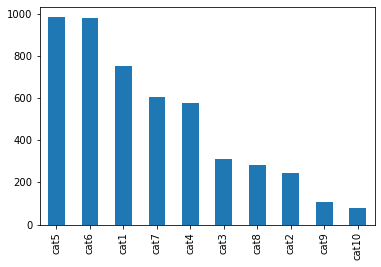

In [6]:
# Lets see total images and in each category for TEST Data
total_test = test_df.shape[0]  

test_df['actual_category'].value_counts().plot.bar()
print(test_df['actual_category'].value_counts())
print("\n Total json files/image files = : ", test_df.shape[0])

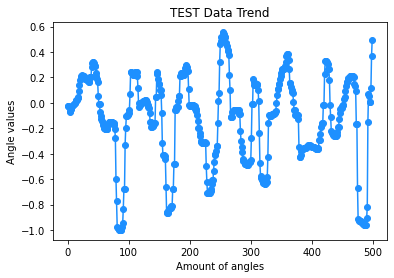

In [7]:
# Lets plot the graph to look at our TEST dataset trend
# Plotting of ALL JSON angle values on graph

plt.title("TEST Data Trend")
plt.xlabel("Amount of angles")
plt.ylabel("Angle values")
plt.plot(test_df['actual_angle_value'][0:500], marker="o", color="dodgerblue")   

# 17. Create test generator

Batch_size is 1 to run through every image in test images

In [8]:
test_datagen = ImageDataGenerator(rescale=1./255)
batch_size = 1

test_generator = test_datagen.flow_from_dataframe(
    test_df, 
    test_filepath,
    x_col='image_filename',
    y_col=None,
    class_mode=None,
    target_size=(120,160), 
    batch_size=batch_size,
    shuffle=False 
)

Found 4917 validated image filenames.


# 18. Prediction of test data

The images are predicted accordingly to train_generator indices classes

In [9]:
%%time

# Prediction of test data images 
# np.ceil to round off array value to whole number
# Use reset outputs in orderly manner
predict = model.predict_generator(test_generator, steps=np.ceil(total_test/batch_size))

# Get total predicted images       
print("Number of predicted images:", len(predict), "\n")

# Get predictions in array
# labelled are generated according to train-generator mapping 
print("   cat1    cat10    cat2 \t\t\t    cat3  \n\n", predict, "\n")    

Number of predicted images: 4917 

   cat1    cat10    cat2 			    cat3  

 [[1.2930346e-08 4.6476403e-10 4.3021262e-07 ... 7.0876602e-05
  2.3827211e-07 2.1464384e-08]
 [1.6184041e-08 3.8827747e-10 4.1114393e-07 ... 5.4769986e-05
  1.6666765e-07 1.6551374e-08]
 [8.4941352e-09 2.4474997e-10 2.7386690e-07 ... 6.2534411e-05
  1.4833256e-07 1.2248681e-08]
 ...
 [7.3396154e-06 1.9183499e-09 2.3373335e-05 ... 3.4101458e-08
  1.9317677e-10 6.0781278e-09]
 [5.5220289e-06 1.8642359e-08 9.9298792e-05 ... 1.5868129e-06
  3.7315542e-09 1.2042423e-08]
 [2.9574853e-06 2.6667474e-08 6.7088920e-05 ... 7.1605323e-06
  3.3994219e-08 2.0372497e-08]] 

Wall time: 11min 15s


# 19. Use np.argmax to get max value from array as predicted answer

In [10]:
test_df['category'] = np.argmax(predict, axis=-1) 

# Lets see the some predicted values for each category of images
# Use [?:?] to specify range or view all by removing brackets
print(test_df['category'][0:3]) 

0    5
1    5
2    5
Name: category, dtype: int64


# 20. Use train class indices for mapping labels

In [11]:
label_map = dict((v,k) for k,v in train_generator.class_indices.items())
test_df['category'] = test_df['category'].replace(label_map)

print(label_map, "\n")

# See the output of mapped labels of predictions
print(test_df['category'][0:4], "\n")

{0: 'cat1', 1: 'cat10', 2: 'cat2', 3: 'cat3', 4: 'cat4', 5: 'cat5', 6: 'cat6', 7: 'cat7', 8: 'cat8', 9: 'cat9'} 

0    cat5
1    cat5
2    cat5
3    cat5
Name: category, dtype: object 



# 21. View the amount of predicted image of each category

cat5     1090
cat6      966
cat1      759
cat7      649
cat4      458
cat3      341
cat2      245
cat8      238
cat10      87
cat9       84
Name: category, dtype: int64

Total predicted images: 4917


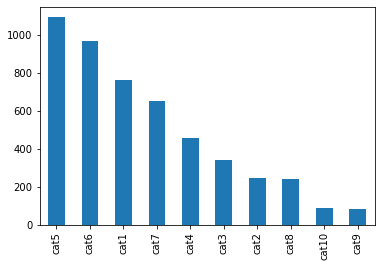

In [12]:
# See amount of images predicted per category
test_df['category'].value_counts()
print(test_df['category'].value_counts())

# View in a bar graph
test_df['category'].value_counts().plot.bar()

# Lets print the total predicted images 
print("\nTotal predicted images:", test_df.shape[0])

# 22. View predicted result with images

Calculate amt of subplot ( x * y = total value of plots displayed)

Since we have category and actual category, we can check if predicted answer is correct if category equals to actual category

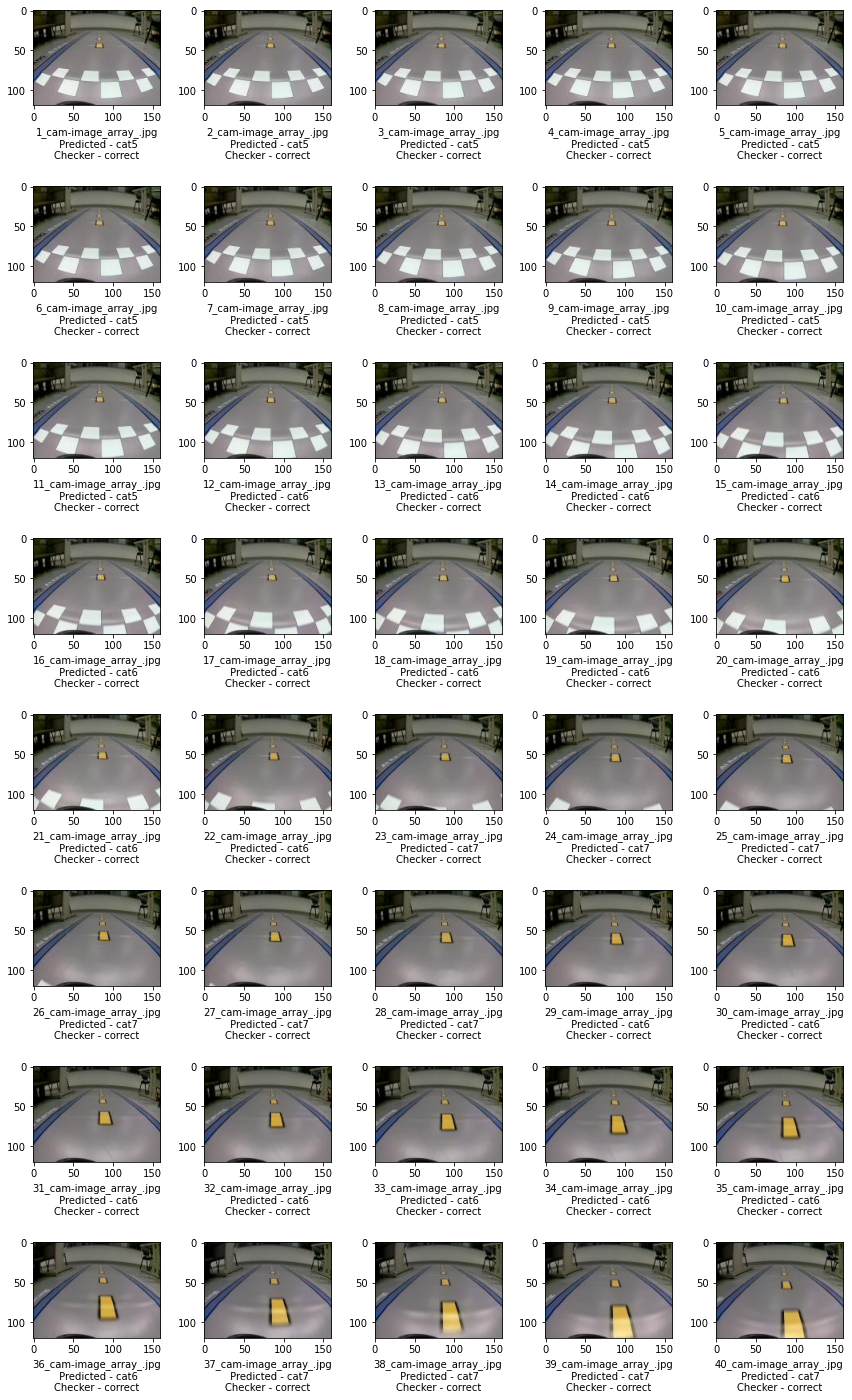

In [13]:
sample_test = test_df.head(40)
sample_test.head()
plt.figure(figsize=(12, 24))

for index, row in sample_test.iterrows():         
        filename = row['image_filename']
        category = row['category']
        actual_category = row['actual_category']
        img = load_img(filepath+filename, target_size=(120,160))

        plt.subplot(10, 5, index+1)      
        plt.imshow(img) 
        
        # Now we compare both actual and predicted category to get our corrections
        if actual_category == category:
            plt.xlabel(filename + "\n Predicted - " + category + "\nChecker - correct")

        else:
            plt.xlabel(filename + "\n Predicted - " + category + "\nChecker - wrong")        
plt.tight_layout()
plt.show()


# 23. Create a 'checker' dataframe which will check all our predictions and display in dataframe

This dataframe will contain correct/wrong for comparing the actual and predicted category 


In [14]:
checker=[]

for index, row in test_df.iterrows():
        category = row['category']
        actual_category = row['actual_category']

        if actual_category == category:
            checker.append("Correct")
        else:
            checker.append("Wrong")
    
checker_df = pd.DataFrame({
  'pred_checker': checker  
})

checker_df

,pred_checker
0,Correct
1,Correct
2,Correct
3,Correct
4,Correct
...,...
4912,Correct
4913,Correct
4914,Correct
4915,Correct


# We will use 4 methods to measure prediction accuracy. The first one is the 'checker'

# 24. It seems that our predictions are okay on the trained dataset. However, it can be improved so we need to fine-tune our model

Lets check the amount of correct/wrong predicted images


Correct    4260
Wrong       657
Name: pred_checker, dtype: int64 

Accuracy of wrong predictions: 13.36%
Accuracy of correct predictions: 86.64%


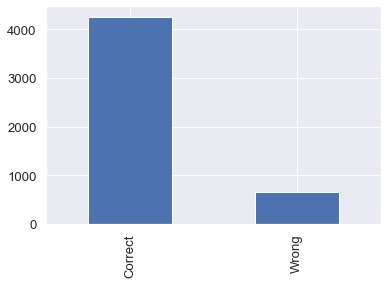

In [21]:
checker_df['pred_checker'].value_counts().plot.bar()
print(checker_df['pred_checker'].value_counts(), "\n")

print("Accuracy of wrong predictions: {0:.2f}%".format((checker_df['pred_checker'].value_counts()[1])/total_test*100))
print("Accuracy of correct predictions: {0:.2f}%".format((checker_df['pred_checker'].value_counts()[0])/total_test*100))

# For the second method, we will create a confusion matrix heatmap. For this, we need to get our predicted labels (predict.test) and true labels (predict.train)

# 25. Plot confusion matrix for our data, I specified 4000 labels instead of all 4916 labels

In [16]:
%%time

# Get actual prediction of train image
pred2 = model.predict_generator(train_generator, steps=np.ceil(total_train/batch_size)) #actual 

# Predict is predicted test image
y_pred = np.argmax(predict, 1)   
y_test = np.argmax(pred2, 1)  

Wall time: 30min 25s


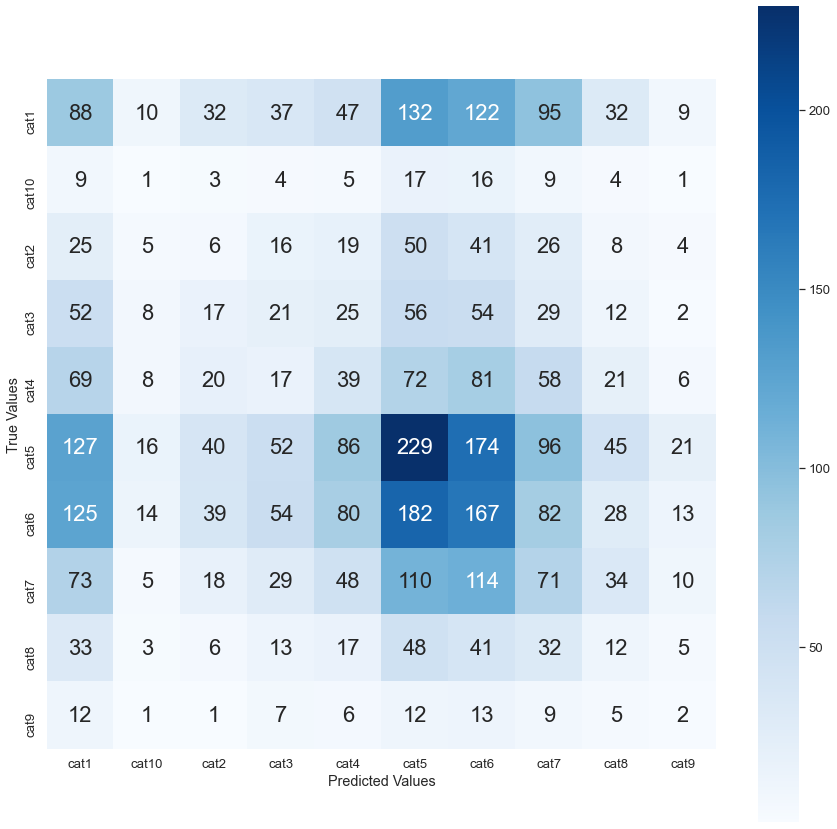

Wall time: 5.06 s


In [17]:
%%time

import seaborn as sns
from sklearn.metrics import confusion_matrix

fig = plt.figure(figsize=(15, 15))
sns.set(font_scale=1.2)
cm = confusion_matrix(y_test[0:4000], y_pred[0:4000])
categories=train_generator.class_indices

sns.heatmap(cm, square=True, annot=True,annot_kws={"size": 22}, cbar=True, cmap=plt.cm.Blues,
            xticklabels=categories, yticklabels=categories, 
            fmt='.4g',
           )

plt.xlabel('Predicted Values')
plt.ylabel('True Values');
plt.show();

# For the third method, we calculate Precision Recall, which shows the positive prediction images and actual positive images
# 26. Plot Precision Recall 

# For the fourth method, we can calculate the individual prediction accuracy of each category
# 27. Plot individual prediction accuracy

In [18]:
# Define functions 

def precision(label, confusion_matrix):
    col = confusion_matrix[:, label]
    return confusion_matrix[label, label] / col.sum()
    
def recall(label, confusion_matrix):
    row = confusion_matrix[label, :]
    return confusion_matrix[label, label] / row.sum()

def precision_macro_average(confusion_matrix):
    rows, columns = confusion_matrix.shape
    sum_of_precisions = 0
    for label in range(rows):
        sum_of_precisions += precision(label, confusion_matrix)
    return sum_of_precisions / rows

def recall_macro_average(confusion_matrix):
    rows, columns = confusion_matrix.shape
    sum_of_recalls = 0
    for label in range(columns):
        sum_of_recalls += recall(label, confusion_matrix)
    return sum_of_recalls / columns


cm = confusion_matrix(y_test[0:4000], y_pred[0:4000])
print(cm, "\n")
print(categories,"\n")

print("label precision recall")
for label in range(10):
    print(f"{label:5d} {precision(label, cm):9.3f} {recall(label, cm):6.3f}")
    
print("precision total:", precision_macro_average(cm)*100,"%")

print("recall total:", recall_macro_average(cm)*100,"%")

# cm.astype converts the predicted image to float
# cm.sum is max value for each category = 100
# np.newaxis is to rearrange the cm.sum layout from horizontal to vertical to match cmastype
# calculate percentage

cm = (cm.astype('float') / cm.sum(axis=1)[:, np.newaxis])*100
print("\nAccuracy for each category:\n     cat1\tcat10\t      cat2\t  cat3\t      cat4\t   cat5\n",cm.diagonal())
print("    cat6\t  cat7\t      cat8\t  cat9") 


[[ 88  10  32  37  47 132 122  95  32   9]
 [  9   1   3   4   5  17  16   9   4   1]
 [ 25   5   6  16  19  50  41  26   8   4]
 [ 52   8  17  21  25  56  54  29  12   2]
 [ 69   8  20  17  39  72  81  58  21   6]
 [127  16  40  52  86 229 174  96  45  21]
 [125  14  39  54  80 182 167  82  28  13]
 [ 73   5  18  29  48 110 114  71  34  10]
 [ 33   3   6  13  17  48  41  32  12   5]
 [ 12   1   1   7   6  12  13   9   5   2]] 

{'cat1': 0, 'cat10': 1, 'cat2': 2, 'cat3': 3, 'cat4': 4, 'cat5': 5, 'cat6': 6, 'cat7': 7, 'cat8': 8, 'cat9': 9} 

label precision recall
    0     0.144  0.146
    1     0.014  0.014
    2     0.033  0.030
    3     0.084  0.076
    4     0.105  0.100
    5     0.252  0.258
    6     0.203  0.213
    7     0.140  0.139
    8     0.060  0.057
    9     0.027  0.029
precision total: 10.617035343776507 %
recall total: 10.627210321246885 %

Accuracy for each category:
     cat1	cat10	      cat2	  cat3	      cat4	   cat5
 [14.56953642  1.44927536  3.          7.6086

# 28. Lastly, save predictions into CSV file and view results

We can take a look at our csv file with submission_df

In [19]:
copy_test_df = test_df.copy()
copy_checker_df = checker_df.copy()

submission_df = copy_test_df.join(copy_checker_df)

submission_df['json filename'] = submission_df['json_filename']   
submission_df['image filename'] = submission_df['image_filename']       
submission_df['prediction'] = submission_df['category']  #label
submission_df['actual category'] = submission_df['actual_category']  #label
submission_df['checker'] = submission_df['pred_checker']

submission_df.drop(['json_filename','image_filename', 'category','actual_category', 'pred_checker', 'actual_angle_value'], axis=1, inplace=True) #True
submission_df.to_csv('CarAngle1.csv', index=False)

print("Saved as .CSV File")

submission_df.head(300)


Saved as .CSV File


,json filename,image filename,prediction,actual category,checker
0,record_1.json,1_cam-image_array_.jpg,cat5,cat5,Correct
1,record_2.json,2_cam-image_array_.jpg,cat5,cat5,Correct
2,record_3.json,3_cam-image_array_.jpg,cat5,cat5,Correct
3,record_4.json,4_cam-image_array_.jpg,cat5,cat5,Correct
4,record_5.json,5_cam-image_array_.jpg,cat5,cat5,Correct
...,...,...,...,...,...
295,record_296.json,296_cam-image_array_.jpg,cat3,cat3,Correct
296,record_297.json,297_cam-image_array_.jpg,cat3,cat3,Correct
297,record_298.json,298_cam-image_array_.jpg,cat3,cat3,Correct
298,record_299.json,299_cam-image_array_.jpg,cat3,cat3,Correct
